### Bienvenidos a mi analisis de siniestros viales, espero comprendan y les agrade el siguiente estudio sobre accidentes en la ciudad de buenos aires


---


Extraccion de datos: se nos brindan 2 archivos .xlsx donde se encuentran los hechos de homicidios y de lesiones ocacionados por siniestros viales.

En este notebook nos centraremos en el preprocesamiento de los datos del archivo de homicidios.xlsx, luego haremos un breve analisis y lo exportaremos para trabajarlo en Power BI

In [612]:
#importamos las librerias que seran necesarias.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [613]:
#extraemos la data de homicidios en una variable, es importante tener instalado openpyxl
homicidios = pd.ExcelFile('data/homicidios.xlsx')

In [614]:
#usamos una variable para obtener las hojas del excel
homicidios_sheets = homicidios.sheet_names
#usamos parse para extraer la tabla de hechos
hechos_homicidios = homicidios.parse(homicidios_sheets[0])
#y otro parse para extraer la tabla de victimas
victimas_homicidios = homicidios.parse(homicidios_sheets[2])

In [615]:
hechos_homicidios.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

In [616]:
victimas_homicidios.columns

Index(['ID_hecho', 'FECHA', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO',
       'EDAD', 'FECHA_FALLECIMIENTO'],
      dtype='object')

Vemos que los nombres de las columnas estan de manera distintas, modifiquemos la columna ID para poder hacer un merge a estas dos tablas.

In [617]:
victimas_homicidios.rename(columns={'ID_hecho': 'ID'}, inplace=True)

In [618]:
homicidios = pd.merge(hechos_homicidios, victimas_homicidios, on='ID')

In [619]:
homicidios.columns

Index(['ID', 'N_VICTIMAS', 'FECHA_x', 'AAAA_x', 'MM_x', 'DD_x', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA_x', 'ACUSADO', 'FECHA_y', 'AAAA_y', 'MM_y',
       'DD_y', 'ROL', 'VICTIMA_y', 'SEXO', 'EDAD', 'FECHA_FALLECIMIENTO'],
      dtype='object')

In [620]:
#eliminamos las columnas duplicadas.
homicidios.drop(columns={'FECHA_y', 'AAAA_y', 'MM_y', 'DD_y', 'VICTIMA_x'}, inplace=True)

In [621]:
homicidios.columns

Index(['ID', 'N_VICTIMAS', 'FECHA_x', 'AAAA_x', 'MM_x', 'DD_x', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'ACUSADO', 'ROL', 'VICTIMA_y', 'SEXO', 'EDAD',
       'FECHA_FALLECIMIENTO'],
      dtype='object')

In [622]:
#podemos crear una pequenia funcion para convertir las columnas en letra minuscula para
# trabajar de una manera mas comoda con pandas
columnas = ['ID', 'N_VICTIMAS', 'FECHA_x', 'AAAA_x', 'MM_x', 'DD_x', 'HORA', 'HH',
            'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
            'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
            'PARTICIPANTES', 'ACUSADO', 'ROL', 'VICTIMA_y', 'SEXO', 'EDAD',
            'FECHA_FALLECIMIENTO']

# Convertir los nombres de columnas a minúsculas
columnas_min = [columna.lower() for columna in columnas]

# Crear un diccionario de rename
rename_dict = {columna_original: columna_nueva for columna_original, columna_nueva in zip(columnas, columnas_min)}


In [623]:
# utilizamos la funcion
homicidios.rename(columns=rename_dict, inplace=True)
# y renombramos manualmente las columnas que pueden dificultarnos su llamado.
homicidios.rename(columns={'victima_y': 'victima', 'dirección normalizada': 'direccion', 'pos y': 'pos_y', 'pos x': 'pos_x', 'fecha_x': 'fecha', 'aaaa_x': 'anio', 'mm_x': 'mes', 'dd_x': 'dia', 'hh': 'franja_horaria'}, inplace=True)

In [624]:
homicidios.head(2)

,id,n_victimas,fecha,anio,mes,dia,hora,franja_horaria,lugar_del_hecho,tipo_de_calle,...,xy (caba),pos_x,pos_y,participantes,acusado,rol,victima,sexo,edad,fecha_fallecimiento
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,AUTO,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,PASAJEROS,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00


La base de nuestro dataframe ya luce un poco mas prolijo, procedamos a buscar los valores nulos y tratarlos de manera adecuada.

In [625]:
# utilizamos insa() mas sum() para ver que columnas poseen faltantes de tipo pandas.
homicidios.isna().sum()

id                       0
n_victimas               0
fecha                    0
anio                     0
mes                      0
dia                      0
hora                     0
franja_horaria           0
lugar_del_hecho          0
tipo_de_calle            0
calle                    1
altura                 584
cruce                  177
direccion                9
comuna                   0
xy (caba)                0
pos_x                    0
pos_y                    0
participantes            0
acusado                  0
rol                      0
victima                  0
sexo                     0
edad                     0
fecha_fallecimiento      0
dtype: int64

Podemos ver que solo 3 columnas poseen faltantes, veamos si podemos inputarlos, sino podriamos dejarlos como estan ya que no son columnas muy relevantes, solo cruce puede interesarnos, es mas eliminemos la columna altura 

In [626]:
homicidios.drop(columns=['altura'], inplace=True)

In [627]:
homicidios.set_index('id', inplace=True)

In [628]:
#transformemos los datos

#Columna franja horaria se reemplaza el valor 'SD' por 0 para transformar en enteros
homicidios.franja_horaria.replace('SD', '0', inplace=True)
homicidios.franja_horaria = homicidios.franja_horaria.astype(int)

#columna pos_x se reemplazan las comas por puntos y se convierte a tipo float.
homicidios['pos_x'] = homicidios['pos_x'].str.replace(',', '.', regex=True)
homicidios['pos_x'] = pd.to_numeric(homicidios['pos_x'], errors='coerce')
homicidios['pos_x'].fillna(0.0, inplace=True)

#columna pos_y lo mismo que la anterior
homicidios['pos_y'] = homicidios['pos_y'].str.replace(',', '.', regex=True)
homicidios['pos_y'] = pd.to_numeric(homicidios['pos_y'], errors='coerce')
homicidios['pos_y'].fillna(0.0, inplace=True)


In [629]:

homicidios.edad.replace('SD', "0", inplace=True)
homicidios.edad = homicidios.edad.astype(int)
promedio_edad = homicidios.edad.mean()
#inputamos la edad por promedio de edad:
homicidios.edad.replace(0, promedio_edad, inplace=True)



homicidios.fecha_fallecimiento = pd.to_datetime(homicidios['fecha_fallecimiento'], errors='coerce')

#inputamos faltantes de fecha por la siguiente fecha que figure en el dataframe.
homicidios.fecha_fallecimiento.ffill(inplace=True)

#inputamos faltantes en sexo por el siguiente que figura en el dataframe y con rol y vehiculo hacemos lo mismo
homicidios.sexo.replace('SD', pd.NA, inplace=True)
homicidios.sexo.ffill(inplace=True)
homicidios.sexo = homicidios.sexo.astype('category')


homicidios.rol.replace('SD', pd.NA, inplace=True)
homicidios.rol.ffill(inplace=True)
homicidios.rol = homicidios.rol.astype('category')

homicidios.victima.replace('SD', pd.NA, inplace=True)
homicidios.victima.ffill(inplace=True)
homicidios.victima = homicidios.victima.astype('category')

Ya imputamos los valores que no figuraban como Nan dentro de nuestro set de datos, prosigamos con los que si son nulos

In [630]:
# creamos una pequeña funcion para iterar por las columnas y extraer la canitdad de nulos que poseen
def cuenta_nulos(df):
    nulos_por_columna = {}
    for columna in df.columns:
        if df[columna].isnull().sum() > 0:
            nulos = df[columna].isnull().sum()
            nulos_por_columna[columna] = nulos

    return nulos_por_columna


resultado = cuenta_nulos(homicidios)
resultado

{'calle': 1, 'cruce': 177, 'direccion': 9}

In [631]:
homicidios[homicidios['calle'].isna() == True]

,n_victimas,fecha,anio,mes,dia,hora,franja_horaria,lugar_del_hecho,tipo_de_calle,calle,...,xy (caba),pos_x,pos_y,participantes,acusado,rol,victima,sexo,edad,fecha_fallecimiento
id,,,,,,,,,,,,,,,,,,,,,
2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,NaN,...,Point (. .),0.0,0.0,PEATON-SD,SD,PEATON,PEATON,MASCULINO,39.050209,2016-11-18


podemos observar que la columna anterior no posee la direccion del hecho y tampoco posee datos del acusado, ni coordenadas de lo sucedido, por lo que decidimos en dar de baja esta fila.

In [632]:
homicidios[homicidios['cruce'].isna() == True]

,n_victimas,fecha,anio,mes,dia,hora,franja_horaria,lugar_del_hecho,tipo_de_calle,calle,...,xy (caba),pos_x,pos_y,participantes,acusado,rol,victima,sexo,edad,fecha_fallecimiento
id,,,,,,,,,,,,,,,,,,,,,
2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,ENTRE RIOS AV.,...,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,AUTO,CONDUCTOR,MOTO,MASCULINO,30.000000,2016-01-03
2016-0013,1,2016-02-10,2016,2,10,11:30:00,11,AV ENTRE RIOS 1366,AVENIDA,ENTRE RIOS AV.,...,Point (106616.41069662 100496.44662323),-58.391149,-34.624774,PEATON-AUTO,AUTO,PEATON,PEATON,MASCULINO,16.000000,2016-02-10
2016-0020,1,2016-02-17,2016,2,17,16:00:00,16,SUIPACHA 156,CALLE,SUIPACHA,...,Point (107684.31807562 102519.17333314),-58.379522,-34.606533,PEATON-AUTO,AUTO,PEATON,PEATON,MASCULINO,59.000000,2016-03-02
2016-0047,1,2016-04-15,2016,4,15,05:30:00,5,LIMA 1483,CALLE,LIMA,...,Point (107412.19098904 100391.02557777),-58.382471,-34.625719,PEATON-PASAJEROS,PASAJEROS,PEATON,PEATON,MASCULINO,41.000000,2016-04-15
2016-0049,1,2016-04-17,2016,4,17,00:00:00,0,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,...,Point (. .),-58.377146,-34.636575,SD-SD,SD,PEATON,PEATON,FEMENINO,39.050209,2016-04-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-0082,1,2021-11-06,2021,11,6,04:39:00,4,AU 25 DE MAYO KM7 (ALTURA PASCO),AUTOPISTA,AUTOPISTA 25 DE MAYO,...,Point (106179.07517962 100523.29161457),-58.395919,-34.624535,MOTO-AUTO,AUTO,CONDUCTOR,MOTO,MASCULINO,38.000000,2021-11-06
2021-0087,1,2021-11-27,2021,11,27,11:22:00,11,ESMERALDA 1359,CALLE,ESMERALDA,...,Point (107829.16426745 104166.84427133),-58.377958,-34.591679,PEATON-BICICLETA,BICICLETA,PEATON,PEATON,FEMENINO,73.000000,2021-11-27
2021-0089,1,2021-12-02,2021,12,2,01:10:00,1,AV. GAONA 3655,AVENIDA,GAONA AV.,...,Point (98804.41713890 100872.30706871),-58.476337,-34.621406,MOTO-AUTO,AUTO,CONDUCTOR,MOTO,MASCULINO,41.000000,2021-12-11


La columna cruce no podemos imputarla con algun otro dato de la tabla por lo que la dejaremos cono sin_cruce

In [633]:
homicidios.cruce.fillna('no', inplace=True)

In [634]:
homicidios[homicidios['direccion'].isna() == True].head(2)

,n_victimas,fecha,anio,mes,dia,hora,franja_horaria,lugar_del_hecho,tipo_de_calle,calle,...,xy (caba),pos_x,pos_y,participantes,acusado,rol,victima,sexo,edad,fecha_fallecimiento
id,,,,,,,,,,,,,,,,,,,,,
2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,"LUGONES, LEOPOLDO AV.",...,Point (. .),0.0,0.0,MOTO-SD,SD,CONDUCTOR,MOTO,MASCULINO,39.050209,2016-04-20
2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,AUTOPISTA BUENOS AIRES - LA PLATA,...,Point (. .),0.0,0.0,MOTO-CARGAS,CARGAS,CONDUCTOR,MOTO,MASCULINO,39.050209,2016-10-25


La direccion en cambio podemos llenarla con la calle que ocupa por lo menos

In [635]:
homicidios['direccion'].fillna(homicidios['calle'], inplace=True)
homicidios['direccion'].isna().sum()

1

Veamos si la tabla posee valores duplicados.

In [636]:
homicidios[homicidios.duplicated() == True]

,n_victimas,fecha,anio,mes,dia,hora,franja_horaria,lugar_del_hecho,tipo_de_calle,calle,...,xy (caba),pos_x,pos_y,participantes,acusado,rol,victima,sexo,edad,fecha_fallecimiento
id,,,,,,,,,,,,,,,,,,,,,


La tabla no posee ningun valor duplicado, vamos por buen camino! hagamos un describe al set para ver que nos dice

In [637]:
homicidios.describe()

,n_victimas,fecha,anio,mes,dia,franja_horaria,comuna,pos_x,pos_y,edad,fecha_fallecimiento
count,717.000000,717,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717
mean,1.061367,2018-09-09 01:24:21.087866112,2018.174338,6.688982,15.953975,11.538354,7.430962,-57.382053,-33.992006,41.936766,2018-09-10 03:16:49.205020928
min,1.000000,2016-01-01 00:00:00,2016.000000,1.000000,1.000000,0.000000,0.000000,-58.529942,-34.705250,1.000000,2016-01-01 00:00:00
25%,1.000000,2017-04-01 00:00:00,2017.000000,4.000000,9.000000,6.000000,4.000000,-58.475768,-34.643577,28.000000,2017-04-01 00:00:00
50%,1.000000,2018-07-07 00:00:00,2018.000000,7.000000,16.000000,11.000000,8.000000,-58.442636,-34.622451,39.000000,2018-07-07 00:00:00
75%,1.000000,2019-12-18 00:00:00,2019.000000,10.000000,23.000000,17.000000,11.000000,-58.399147,-34.594883,55.000000,2019-12-18 00:00:00
max,3.000000,2021-12-30 00:00:00,2021.000000,12.000000,31.000000,23.000000,15.000000,0.000000,0.000000,95.000000,2022-01-03 00:00:00
std,0.257024,NaN,1.672655,3.575140,8.674876,6.709265,4.385067,7.803187,4.622508,19.059056,NaN


Podemos observar que la funcion describe() de pandas no nos da informacion muy relevante sobre el dataset, ya que las columnas numericas que posee no son muy relevantes para nuestro caso de estudio. Lo unico que podemos rescatar es la cantidad maxima y minima de victimas y su distribucion.

Podemos centrarnos ahora en modificar el tipo de datos de las columnas para luego poder trabajar sobre ellas de manera mas comoda

In [638]:
homicidios.dtypes

n_victimas                      int64
fecha                  datetime64[ns]
anio                            int64
mes                             int64
dia                             int64
hora                           object
franja_horaria                  int32
lugar_del_hecho                object
tipo_de_calle                  object
calle                          object
cruce                          object
direccion                      object
comuna                          int64
xy (caba)                      object
pos_x                         float64
pos_y                         float64
participantes                  object
acusado                        object
rol                          category
victima                      category
sexo                         category
edad                          float64
fecha_fallecimiento    datetime64[ns]
dtype: object

In [639]:
homicidios.tipo_de_calle = homicidios.tipo_de_calle.astype('category')
homicidios.participantes = homicidios.participantes.astype('category')
homicidios.victima = homicidios.victima.astype('category')
homicidios.acusado = homicidios.acusado.astype('category')
homicidios.comuna = homicidios.comuna.astype('category')

Podrimaos crear una columna de rango etario sobre la edad de las victimas, en base a ello poder hacer un analisis

In [640]:

etiquetas_edad = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81+']

# Creamos los límites de los rangos etarios
limites_edad = [0, 10, 20, 30, 40, 50, 60, 70, 80, float('inf')]

# Utilizamos la función cut de pandas para convertir la columna edad en un rango etario
homicidios['edad'] = pd.cut(homicidios['edad'], bins=limites_edad, labels=etiquetas_edad, right=False)


In [641]:
homicidios.edad

id
2016-0001    11-20
2016-0002    71-80
2016-0003    31-40
2016-0004    11-20
2016-0005    21-30
             ...  
2021-0093    11-20
2021-0094    41-50
2021-0095    21-30
2021-0096    61-70
2021-0097    51-60
Name: edad, Length: 717, dtype: category
Categories (9, object): ['0-10' < '11-20' < '21-30' < '31-40' ... '51-60' < '61-70' < '71-80' < '81+']

In [642]:
homicidios.dtypes

n_victimas                      int64
fecha                  datetime64[ns]
anio                            int64
mes                             int64
dia                             int64
hora                           object
franja_horaria                  int32
lugar_del_hecho                object
tipo_de_calle                category
calle                          object
cruce                          object
direccion                      object
comuna                       category
xy (caba)                      object
pos_x                         float64
pos_y                         float64
participantes                category
acusado                      category
rol                          category
victima                      category
sexo                         category
edad                         category
fecha_fallecimiento    datetime64[ns]
dtype: object

Ahora los datos parece que estan en buena forma, comenzemos con el analisis y saquemos algunas conclusiones propias sobre este dataset brindado.

Lo primero que me llama la atencion es ver en que tipo de calle se dan los accidentes fatales mas frecuentes, tambien que vehiculo utilizan la victima y el acusado.

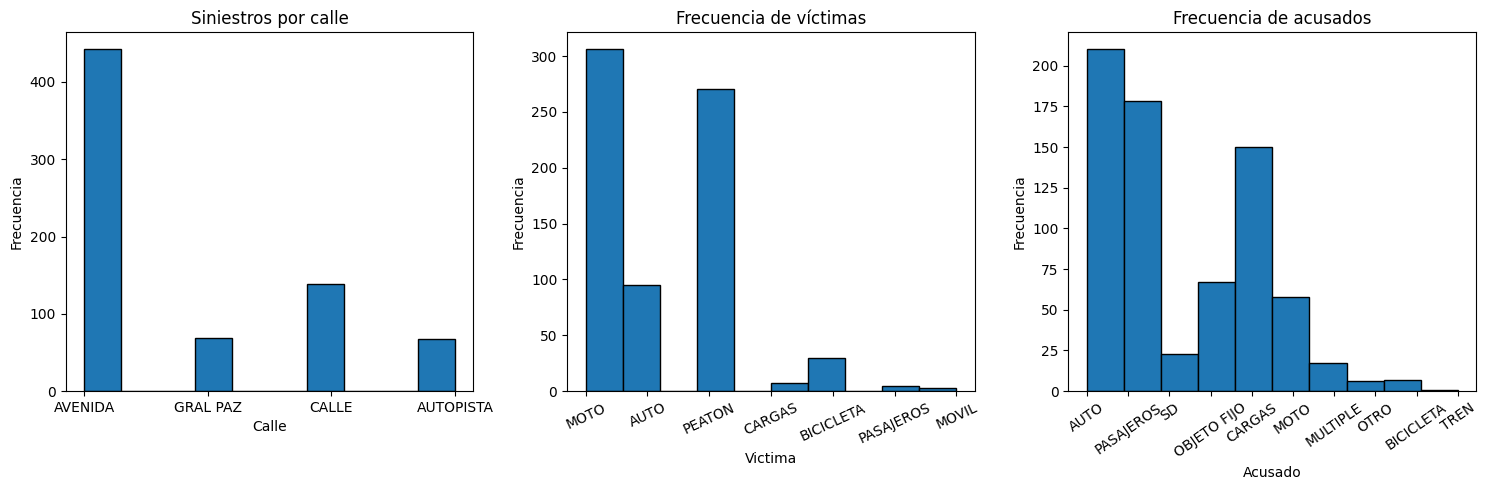

In [643]:
categorias = {
    'tipo_de_calle': homicidios.tipo_de_calle.values,
    'victima': homicidios.victima.values,
    'acusado': homicidios.acusado.values
}

df_cat = pd.DataFrame(categorias)

titulos_cat = ["Siniestros por calle", "Frecuencia de víctimas", "Frecuencia de acusados"]
x_cat = ['Calle', 'Victima', 'Acusado']
rotation_cat = [0, 25, 35]

# Crear una figura con tres subplots en una fila (1 fila y 3 columnas)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Generar un histograma para cada serie en su respectivo subplot
for i, col in enumerate(['tipo_de_calle', 'victima', 'acusado']):
    axs[i].hist(df_cat[col], edgecolor='black')
    axs[i].set_xlabel(x_cat[i])
    axs[i].set_ylabel('Frecuencia')
    axs[i].set_title(titulos_cat[i])
    axs[i].tick_params(axis='x', rotation=rotation_cat[i])

plt.tight_layout()  # Para evitar superposiciones
plt.show()


Interesante!!, podemos ver que la mayoria se siniestros viales fatales se dan en avenidas, la mayor parte de las victimas son motociclistas o peatones y que los principales acusados son los autos y pasajeros que dado por su descripcion son los vehiculos de transporte publico, como asi tambien los vehiculos de cargas

Antes de profundizar en estos datos quiero dar un pequeño vistaso a otros datos categoricos que poseemos tales como el rol, el sexo y el rango etario de las victimas, para tener un poco mas de informacion de porque estos siniestros viales terminaron fatales para estas victimas

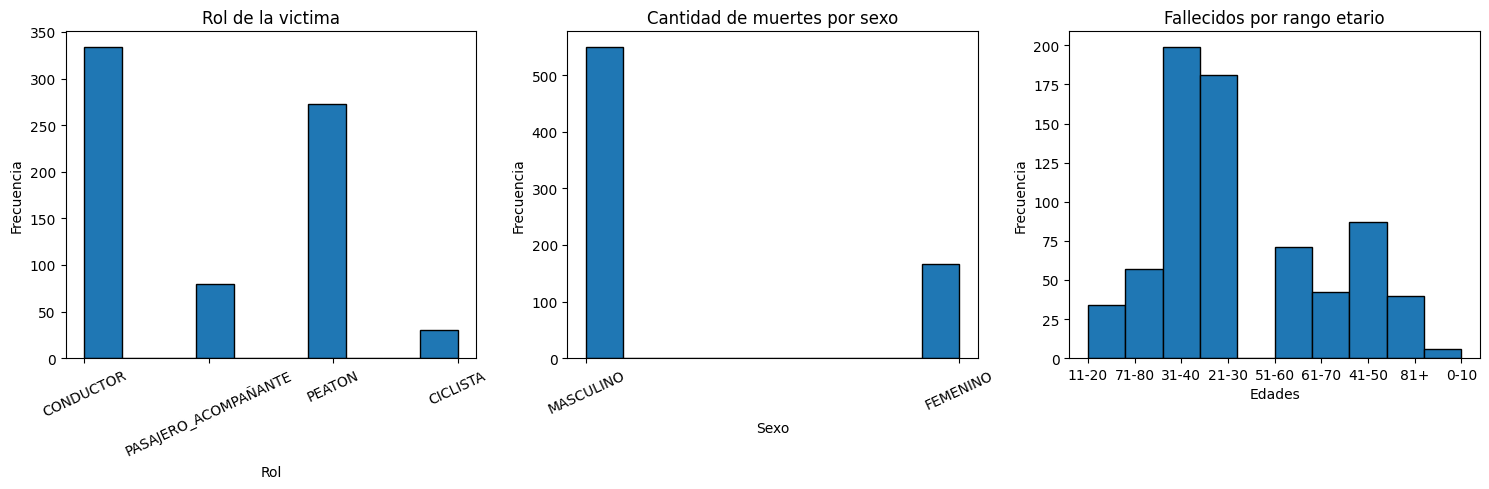

In [644]:
categorias = {
    'rol': homicidios['rol'].values,
    'sexo': homicidios['sexo'].values,
    'rango_etario': homicidios['edad'].values
}

df_victimas_hist = pd.DataFrame(categorias)

titulos_vict = ["Rol de la victima", "Cantidad de muertes por sexo", "Fallecidos por rango etario"]
x_vict = ['Rol', 'Sexo', 'Edades']
rotation_cat = [25, 25, 0]

# Crear una figura con tres subplots en una fila (1 fila y 3 columnas)
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Generar un histograma para cada serie en su respectivo subplot
for i, col in enumerate(['rol', 'sexo', 'rango_etario']):
    axs[i].hist(df_victimas_hist[col], edgecolor='black')
    axs[i].set_xlabel(x_vict[i])
    axs[i].set_ylabel('Frecuencia')
    axs[i].set_title(titulos_vict[i])
    axs[i].tick_params(axis='x', rotation=rotation_cat[i])

plt.tight_layout()  # Para evitar superposiciones
plt.show()

Podemos observar que en su mayoria las victimas son conductores de los mismos vehiculos, personas masculinas y entre los 20 y 40 años de edad, si lo relacionamos un poco con los datos recien vistos podemos concluir los conductores de motos son mas propensos a perder la vida en un siniestro vial.

Seria interesante ver cuantas personas mueren el mismo dia del accidente sin llegar a la hospitalizacion. podemos ver esto restando la fecha de fallecimiento de la fecha del accidente

In [645]:
homicidios['dias_hasta_muerte'] = (homicidios['fecha_fallecimiento'] - homicidios['fecha']).dt.days
print(f'Promedio de dias de vida luego del accidente: {homicidios.dias_hasta_muerte.mean()}')
print(f'Cantidad de fallecidos el mismo dia del accidente: {homicidios.dias_hasta_muerte.value_counts()[0]}')

Promedio de dias de vida luego del accidente: 1.0781032078103208
Cantidad de fallecidos el mismo dia del accidente: 509


Concluimos que una vez el accidente se considera grave es muy probable que la victima muera el mismo dia, esto podriamos reducirlo buscando nuevas maneras de asistir los accidentes de transito

Veamos a travez de los años la cantidad de victimas fallecidas que tuvo Buenos Aires durante los ultimos años

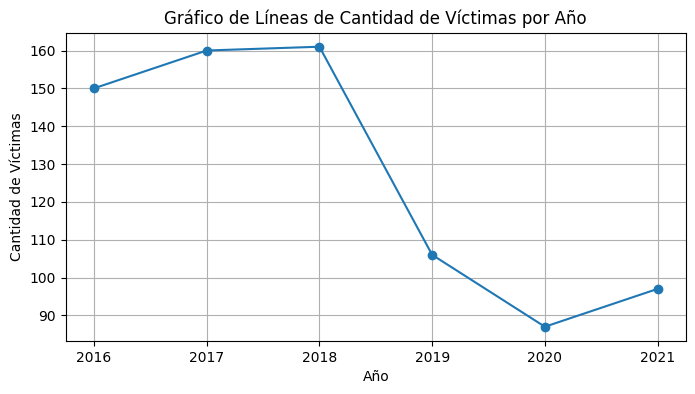

In [646]:
victimas_anio = homicidios.groupby('anio')['n_victimas'].sum()

plt.figure(figsize=(8, 4))  # Ajusta el tamaño de la figura si es necesario
plt.plot(victimas_anio.index, victimas_anio.values, marker='o', linestyle='-')
plt.xlabel('Año')
plt.ylabel('Cantidad de Víctimas')
plt.title('Gráfico de Líneas de Cantidad de Víctimas por Año')
plt.grid(True)  # Agregar una cuadrícula al gráfico si lo deseas

plt.show()


Podemos ver que hubo una gran reduccion de accidentes fatales a partir del año 2019, tambien podemos entender que en el año 2020 hubo una pandemia que redujo el trafico en gran medida por lo que puede ser uno de los motivos de que la cantidad de victimas haya caido tan bajo, deberemos investigar esto desde otras fuentes.

Me interesa investigar un poco mas cuales son los vehiculos que tienen mas accidentes en las avenidas

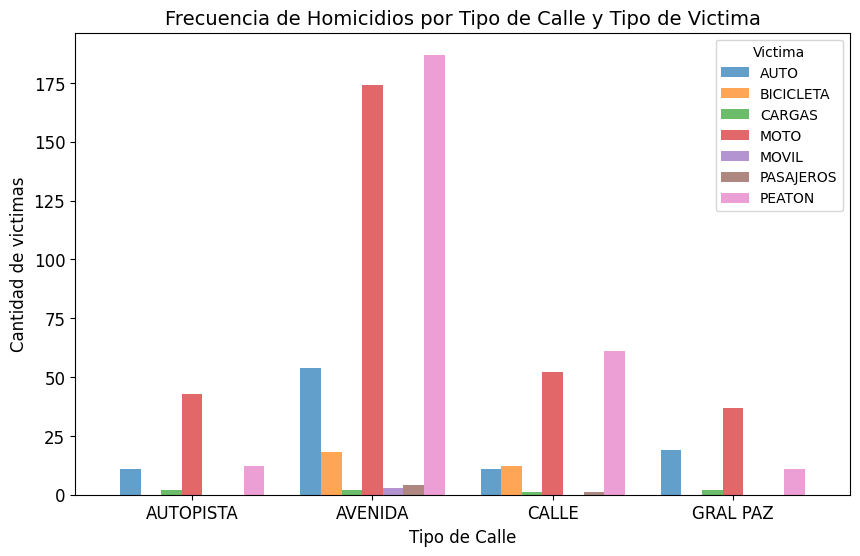

In [647]:
avenidas_acc = pd.crosstab(homicidios['tipo_de_calle'], homicidios['victima'])

ax = avenidas_acc.plot(kind='bar', stacked=False, figsize=(10, 6), width=0.8, alpha=0.7)
plt.legend(title='Victima')
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title('Frecuencia de Homicidios por Tipo de Calle y Tipo de Victima', fontsize=14)
plt.xlabel('Tipo de Calle', fontsize=12)
plt.ylabel('Cantidad de victimas', fontsize=12)
plt.show()

Es realmente impresionante descubrir que los peatones son las principales victimas de los accidentes en avenidas y calles, esto deberia tratarse de varias maneras tales como la implementacion de mas semaforos, o lomadas de burros en las esquinas o incusive de mas educacion vial para los peatones de la ciudad de Buenos Aires

In [648]:
homicidios['cruce'] = homicidios['cruce'].apply(lambda x: 'si' if x != 'no' else x)

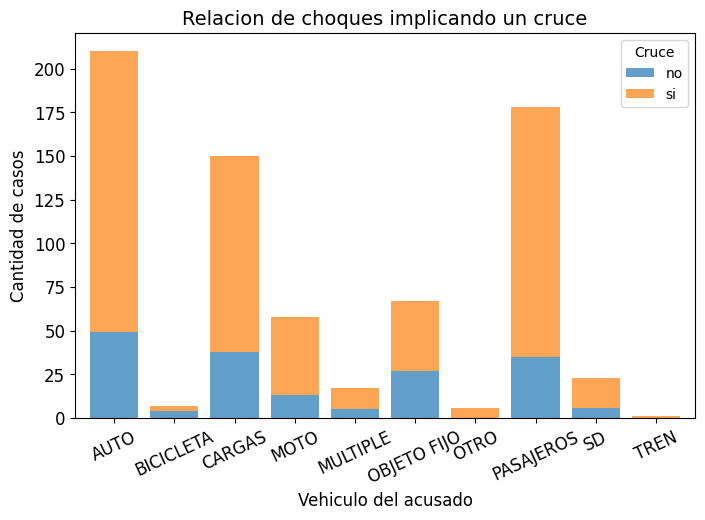

In [649]:
cruces_acc = pd.crosstab(homicidios['acusado'], homicidios['cruce'])
ax = cruces_acc.plot(kind='bar', stacked=True, figsize=(8, 5), width=0.8, alpha=0.7)
plt.legend(title='Cruce')
plt.xticks(fontsize=12, rotation=25)
plt.yticks(fontsize=12)
plt.title('Relacion de choques implicando un cruce', fontsize=14)
plt.xlabel('Vehiculo del acusado', fontsize=12)
plt.ylabel('Cantidad de casos', fontsize=12)
plt.show()

En base al grafico de arriba podemos entender que los cruces son un area importante a tener en cuenta a la hora de manejar, ya que la mayoria de accidentes fatales se producen en uno de estos, con autos y vehiculos de carga como principales efectuadores del accidente

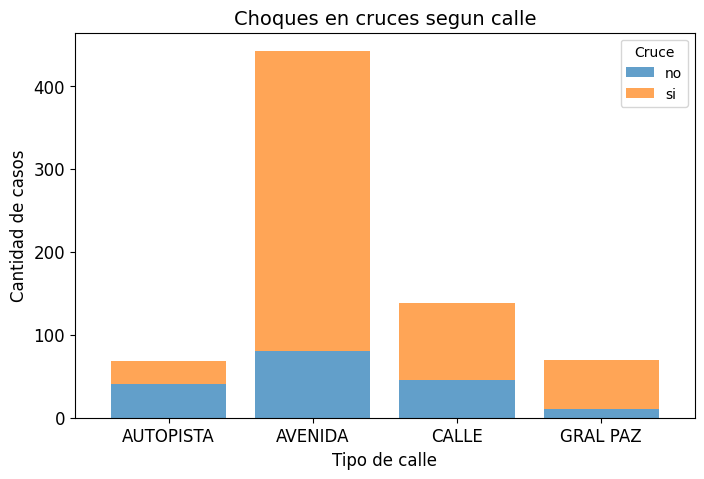

In [650]:
cruce_calle = pd.crosstab(homicidios['tipo_de_calle'], homicidios['cruce'])
ax = cruce_calle.plot(kind='bar', stacked=True, figsize=(8, 5), width=0.8, alpha=0.7)
plt.legend(title='Cruce')
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title('Choques en cruces segun calle', fontsize=14)
plt.xlabel('Tipo de calle', fontsize=12)
plt.ylabel('Cantidad de casos', fontsize=12)
plt.show()

Con este grafico reafirmamos la importancia de utilizar semaforos o lomas de burro o mas carteles de stop en las esquinas, ya que estas son donde mas suceden los siniestros fatales. principalmente en las avenidas.

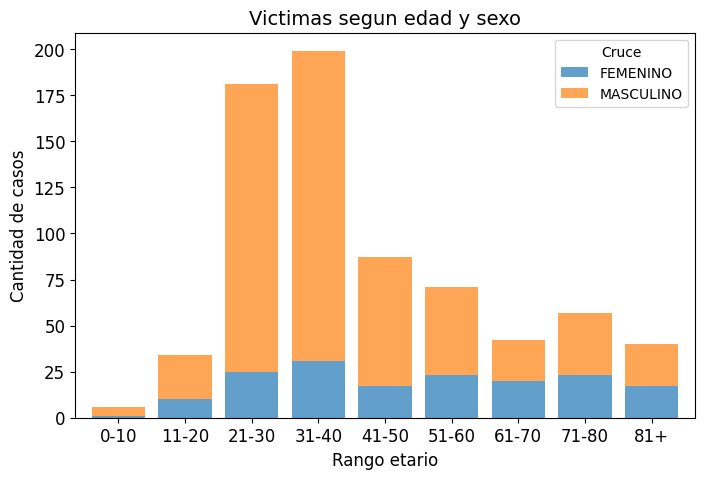

In [651]:
edad_sexo = pd.crosstab(homicidios['edad'], homicidios['sexo'])
ax = edad_sexo.plot(kind='bar', stacked=True, figsize=(8, 5), width=0.8, alpha=0.7)
plt.legend(title='Cruce')
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title('Victimas segun edad y sexo', fontsize=14)
plt.xlabel('Rango etario', fontsize=12)
plt.ylabel('Cantidad de casos', fontsize=12)
plt.show()

Deberiamos poner especial atencion en reeducar a nuestros adultos y jovenes adultos de entre 20 y 40 años sobre los cuidados viales, ya que son los mas expuestos a un accidente fatal.

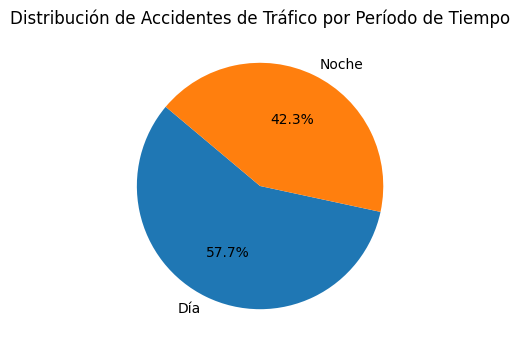

In [652]:
homicidios['hora'] = pd.to_datetime(homicidios['hora'], format='%H:%M:%S', errors='coerce')

homicidios['dia_noche'] = homicidios['hora'].apply(lambda x: 'Día' if 6 <= x.hour < 19 else 'Noche')


conteo_periodo = homicidios['dia_noche'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(conteo_periodo, labels=conteo_periodo.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Accidentes de Tráfico por Período de Tiempo')
plt.show()

Concluimos con que la mayoria de accidentes fatales se producen de dia, pero por un rango muy pequeño

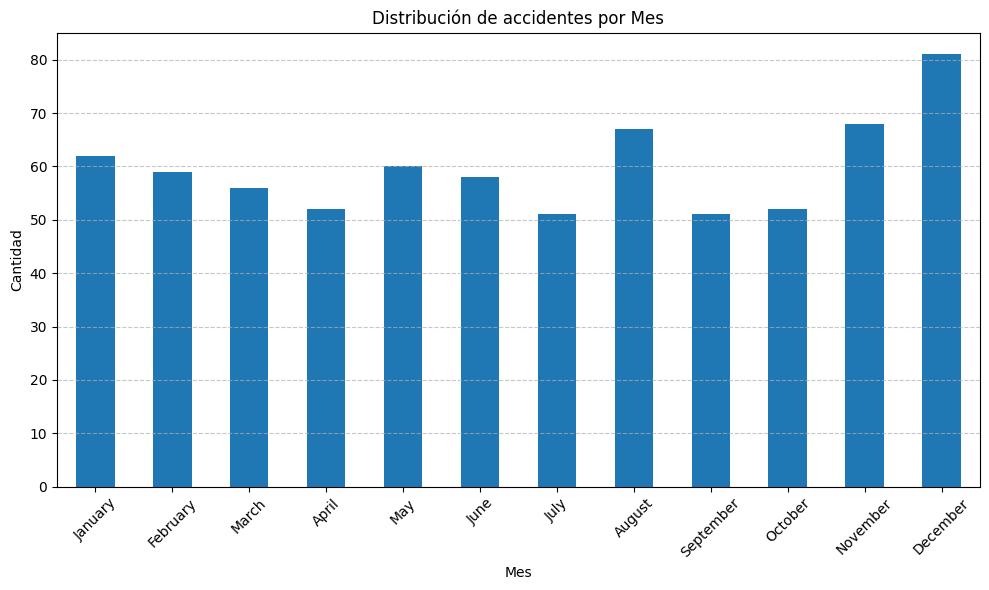

In [653]:
homicidios['mes'] = homicidios['mes'].apply(lambda x: calendar.month_name[x])


conteo_mes = homicidios['mes'].value_counts().reindex(calendar.month_name[1:])  


plt.figure(figsize=(10, 6))
conteo_mes.plot(kind='bar')
plt.title('Distribución de accidentes por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Tambien podemos observar como diciembre es el mes con mayor cantidad de fallecidos registrado, esto se puede deber a que en diciembre es epoca de fiestas y vacaciones para mucha gente, por lo que el aumento de trafico en horas pico haria de diciembre un mes mas peligroso a la hora de conducir.

In [673]:
homicidios.calle.value_counts().head(5)

calle
PAZ, GRAL. AV.                                61
RIVADAVIA AV.                                 20
DEL LIBERTADOR AV.                            19
AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI    14
ALBERDI, JUAN BAUTISTA AV.                    13
Name: count, dtype: int64

Echamos un pequeño vistazo al nombre de las calles donde mas accidentes fatales ocurren

In [674]:
homicidios.n_victimas.value_counts()

n_victimas
1    676
2     38
3      3
Name: count, dtype: int64

Tambien podemos observar la poca probabilidad de que en un accidente haya mas de una victima fatal.

Por el momento hemos adquirido bastante informacion sobre porque suceden estos siniestros viales en Buenos aires, extraigamos la data y continuemos con nuestro analisis en Power BI

In [654]:
homicidios.to_csv('data_extraida/homicidios_ext.csv')

Procedemos a realizar los kpis solicitados

Comenzamos creando un KPI que nos indicara la reduccion de homicidios entre semestre para cumplir nuestro objetivo de reducirlos en un 10% para el semestre siguiente.

In [657]:
#creamos una funcion para calcular el porcentaje de victimas por semestre
def calcular_kpi(semestre_df):
    homicidios = semestre_df['n_victimas'].sum()
    kpi = (homicidios / 3000000) * 100000
    return kpi



kpis_semestrales = []

# Iterarmos a través de cada semestre
for year in range(homicidios['fecha'].dt.year.min(), homicidios['fecha'].dt.year.max() + 1):
    for month in [1, 7]: 
        start_date = pd.Timestamp(year, month, 1)
        end_date = start_date + pd.DateOffset(months=6)
        semestre_df = homicidios[(homicidios['fecha'] >= start_date) & (homicidios['fecha'] < end_date)]
        kpi_semestre = calcular_kpi(semestre_df)
       # Obtener la cantidad de víctimas en el semestre actual
        total_victimas = semestre_df['n_victimas'].sum()
        
        # Crear etiquetas de año y semestre
        etiqueta_semestre = f'Año {year}, Semestre {1 if month == 1 else 2}'
        
        # Agregar los datos a la lista de KPIs
        kpis_semestrales.append((start_date, etiqueta_semestre, total_victimas, kpi_semestre))


kpi_df = pd.DataFrame(kpis_semestrales, columns=['Fecha Inicio Semestre', 'Etiqueta', 'Total de Víctimas', 'KPI'])


kpi_df

   Fecha Inicio Semestre              Etiqueta  Total de Víctimas       KPI
0             2016-01-01  Año 2016, Semestre 1                 67  2.233333
1             2016-07-01  Año 2016, Semestre 2                 83  2.766667
2             2017-01-01  Año 2017, Semestre 1                 81  2.700000
3             2017-07-01  Año 2017, Semestre 2                 79  2.633333
4             2018-01-01  Año 2018, Semestre 1                 76  2.533333
5             2018-07-01  Año 2018, Semestre 2                 85  2.833333
6             2019-01-01  Año 2019, Semestre 1                 59  1.966667
7             2019-07-01  Año 2019, Semestre 2                 47  1.566667
8             2020-01-01  Año 2020, Semestre 1                 31  1.033333
9             2020-07-01  Año 2020, Semestre 2                 56  1.866667
10            2021-01-01  Año 2021, Semestre 1                 55  1.833333
11            2021-07-01  Año 2021, Semestre 2                 42  1.400000


Nuestro KPI nos da los valores deseados por lo que pasamos a extraerlo para su posterior uso en PowerBI

In [658]:
kpi_df.to_csv('data_extraida/kpi1.csv')

El segundo KPI que haremos sera calcular la reduccion del 7% en accidentes fatales de motociclistas. asi que vamos a ello

In [675]:
# creamos una mascara para extraer las victimas que sean motociclistas de nuestro dataframe
df_motociclistas = homicidios[homicidios['victima'] == 'MOTO']

# Obtenemos el año actual
grupo_anio = df_motociclistas.groupby('anio')['n_victimas'].sum().reset_index()


grupo_anio['evolucion'] = grupo_anio['n_victimas'].pct_change() * 100
grupo_anio['diferencia_anterior'] = grupo_anio['n_victimas'].diff()


grupo_anio.columns = ['anio', 'cantidad_victimas', 'evolucion', 'diferencia_anterior']

 
grupo_anio

,anio,cantidad_victimas,evolucion,diferencia_anterior
0,2016,69,NaN,NaN
1,2017,63,-8.695652,-6.0
2,2018,61,-3.174603,-2.0
3,2019,50,-18.032787,-11.0
4,2020,32,-36.000000,-18.0
5,2021,46,43.750000,14.0


Extraemos el segundo KPI

In [ ]:
grupo_anio.to_csv('data_extraida/kpi2.csv')

El tercer KPI que vamos a realizar sera de una manera similar al de motociclistas, pero poniendo atencion en los peatones que es en quien mas podemos concientizar para evitar los accidentes.

Calcularemos una reduccion del 10% de homicidios en peatones en un año 

In [677]:
df_peatones = homicidios[homicidios['victima'] == 'PEATON']

grupo_peatones = df_peatones.groupby('anio')['n_victimas'].sum().reset_index()

grupo_peatones['peatones_anio_anterior'] = grupo_peatones['n_victimas'].shift(1)

grupo_peatones['reduccion'] = ((grupo_peatones['peatones_anio_anterior'] - grupo_peatones['n_victimas']) / grupo_peatones['peatones_anio_anterior']) * 100

grupo_peatones

,anio,n_victimas,peatones_anio_anterior,reduccion
0,2016,50,NaN,NaN
1,2017,52,50.0,-4.000000
2,2018,68,52.0,-30.769231
3,2019,37,68.0,45.588235
4,2020,36,37.0,2.702703
5,2021,33,36.0,8.333333


In [ ]:
grupo_peatones.to_csv('data_extraida/kpi3.csv')